Data source: https://www.kaggle.com/datasets/kanchana1990/global-news-engagement-on-social-media/data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [2]:
data1= pd.read_csv('~/Desktop/Dev/data/archive/al_jazeera.csv')

In [3]:
data1['id']='al_jazeera'


In [4]:
data1.head(4)

,text,likes,comments,shares,id
0,“Numbers dropped by around half after the eart...,303,15,5,al_jazeera
1,This exclusive footage obtained by Al Jazeera ...,809,174,81,al_jazeera
2,The disappearance of 6-year-old Joshlin Smith ...,236,75,33,al_jazeera
3,Millions are still suffering the pandemic’s li...,87,11,11,al_jazeera


In [5]:
# import bbc
data2= pd.read_csv('~/Desktop/Dev/data/archive/bbc.csv')
data2['id']='bbc'
data2.head(4)

,text,likes,comments,shares,id
0,Queen Camilla was given a miniature version of...,577,228,50,bbc
1,"The study found females of five ""menopausal"" w...",174,18,52,bbc
2,The Ivy League university is named after Elihu...,116,59,44,bbc
3,"When the law passed in 2019, it sparked mass p...",133,56,16,bbc


In [6]:
#Import cnn 
data3= pd.read_csv('~/Desktop/Dev/data/archive/cnn.csv')
data3['id']= 'cnn'
data3.head(4)

,text,likes,comments,shares,id
0,Measles cases are increasing in the United Sta...,17,34,1,cnn
1,"At the turn of the millennium, web-based techn...",192,81,28,cnn
2,SpaceX launched the world's most powerful rock...,233,122,68,cnn
3,Italy’s competition authority has fined TikTok...,131,144,17,cnn


In [7]:
#Import reuters
data4= pd.read_csv('~/Desktop/Dev/data/archive/reuters.csv')
data4['id']='reuters'
data4.head(4)

,text,likes,comments,shares,id
0,Taiwan dispatched coast guard boats to join a ...,3,1,1,reuters
1,Croatia's historic city of Dubrovnik aims to l...,11,5,1,reuters
2,As Senegal holds a delayed election on March 2...,5,4,2,reuters
3,Exclusive: Citigroup is investigating workplac...,4,6,0,reuters


In [8]:
# Merge all the data together as one dataset
df= pd.concat([data1, data2, data3, data4], ignore_index=True)
df

,text,likes,comments,shares,id
0,“Numbers dropped by around half after the eart...,303,15,5,al_jazeera
1,This exclusive footage obtained by Al Jazeera ...,809,174,81,al_jazeera
2,The disappearance of 6-year-old Joshlin Smith ...,236,75,33,al_jazeera
3,Millions are still suffering the pandemic’s li...,87,11,11,al_jazeera
4,Multan Sultans face Peshawar Zalmi in the Paki...,522,71,5,al_jazeera
...,...,...,...,...,...
3748,China's top legislators vowed to enact a slew ...,31,1,7,reuters
3749,As the US Congress struggles to pass legislati...,78,46,7,reuters
3750,President Joe Biden's State of the Union addre...,49,37,4,reuters
3751,Australia's Great Barrier Reef has been hit by...,54,4,10,reuters


In [9]:
df.dtypes

text        object
likes        int64
comments     int64
shares       int64
id          object
dtype: object

In [10]:
df.describe(include='all')

,text,likes,comments,shares,id
count,3734,3753.000000,3753.000000,3753.000000,3753
unique,3720,NaN,NaN,NaN,4
top,A look at the day ahead in U.S. and global mar...,NaN,NaN,NaN,al_jazeera
freq,4,NaN,NaN,NaN,1000
mean,NaN,580.147882,210.482547,64.050093,NaN
std,NaN,1526.048747,328.665644,149.340794,NaN
min,NaN,3.000000,0.000000,0.000000,NaN
25%,NaN,128.000000,24.000000,12.000000,NaN
50%,NaN,293.000000,109.000000,33.000000,NaN
75%,NaN,537.000000,254.000000,62.000000,NaN


In [11]:
# data cleaning
df.isna().sum()

text        19
likes        0
comments     0
shares       0
id           0
dtype: int64

In [12]:
df.dropna()

,text,likes,comments,shares,id
0,“Numbers dropped by around half after the eart...,303,15,5,al_jazeera
1,This exclusive footage obtained by Al Jazeera ...,809,174,81,al_jazeera
2,The disappearance of 6-year-old Joshlin Smith ...,236,75,33,al_jazeera
3,Millions are still suffering the pandemic’s li...,87,11,11,al_jazeera
4,Multan Sultans face Peshawar Zalmi in the Paki...,522,71,5,al_jazeera
...,...,...,...,...,...
3748,China's top legislators vowed to enact a slew ...,31,1,7,reuters
3749,As the US Congress struggles to pass legislati...,78,46,7,reuters
3750,President Joe Biden's State of the Union addre...,49,37,4,reuters
3751,Australia's Great Barrier Reef has been hit by...,54,4,10,reuters


In [13]:
df.isna().sum()

text        19
likes        0
comments     0
shares       0
id           0
dtype: int64

In [14]:
df.duplicated().sum()

0

In [15]:
df = df.dropna()

In [16]:
df.isna().sum()

text        0
likes       0
comments    0
shares      0
id          0
dtype: int64

# Data Analysis
we need to apply the VADER sentiment analyser on our comment get the sentiment polarity. VADER relies on a lexicon of words pre-scored for their sentiment polarity (positive, negative, or neutral). Each word in the lexicon is assigned a polarity score ranging from -1 (most negative) to +1 (most positive), with 0 indicating neutrality.

In [18]:

analyzer = SentimentIntensityAnalyzer()
def get_score(text):
    text_str = str(text)
    return analyzer.polarity_scores(text_str)['compound']

df['sentiment_score'] = df['text'].apply(get_score)
df.head(5)

/var/folders/0n/fqv6wxl94_v2jybsldyj7c540000gn/T/ipykernel_20402/1134112606.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_score'] = df['text'].apply(get_score)


,text,likes,comments,shares,id,sentiment_score
0,“Numbers dropped by around half after the eart...,303,15,5,al_jazeera,0.0000
1,This exclusive footage obtained by Al Jazeera ...,809,174,81,al_jazeera,-0.4939
2,The disappearance of 6-year-old Joshlin Smith ...,236,75,33,al_jazeera,-0.2023
3,Millions are still suffering the pandemic’s li...,87,11,11,al_jazeera,-0.8225
4,Multan Sultans face Peshawar Zalmi in the Paki...,522,71,5,al_jazeera,0.5994


In [19]:
# convert score to sentiment

def score_to_sentiment(score, threshold=0.1):
    if score >= threshold:
        return 'Positive'
    elif score <= -threshold:
        return 'Negative'
    else: 
        return 'Neutral'

df['Sentiment'] = df['sentiment_score'].apply(score_to_sentiment)

/var/folders/0n/fqv6wxl94_v2jybsldyj7c540000gn/T/ipykernel_20402/3918346623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment'] = df['sentiment_score'].apply(score_to_sentiment)


In [20]:
df.head(5)

,text,likes,comments,shares,id,sentiment_score,Sentiment
0,“Numbers dropped by around half after the eart...,303,15,5,al_jazeera,0.0000,Neutral
1,This exclusive footage obtained by Al Jazeera ...,809,174,81,al_jazeera,-0.4939,Negative
2,The disappearance of 6-year-old Joshlin Smith ...,236,75,33,al_jazeera,-0.2023,Negative
3,Millions are still suffering the pandemic’s li...,87,11,11,al_jazeera,-0.8225,Negative
4,Multan Sultans face Peshawar Zalmi in the Paki...,522,71,5,al_jazeera,0.5994,Positive


Data viz

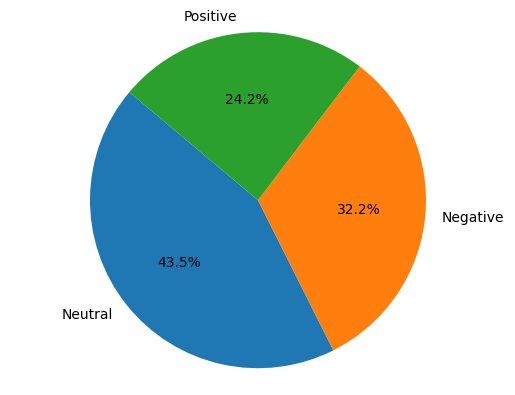

In [21]:
plt.pie(df['Sentiment'].value_counts(), labels=df['Sentiment'].unique(), autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

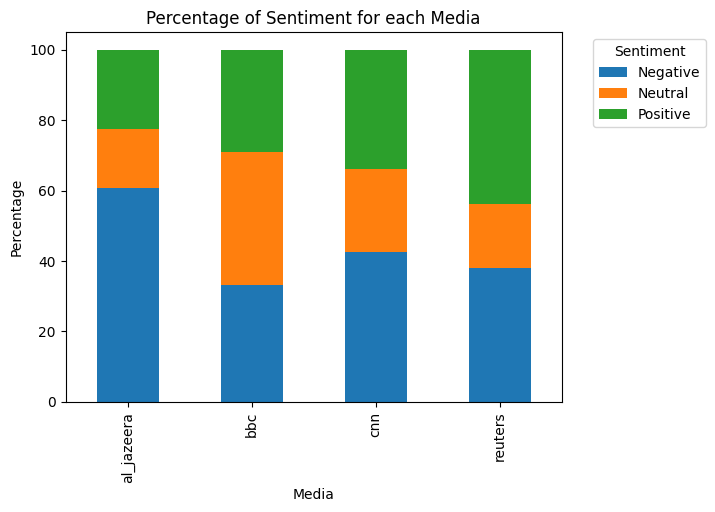

In [22]:
# Calculate the percentage of each polarity for each id
sentiment_counts = df.groupby(['id', 'Sentiment']).size().unstack(fill_value=0)
sentiment_percentages = sentiment_counts.div(sentiment_counts.sum(axis=1), axis=0) * 100

# Plot the bar graph
sentiment_percentages.plot(kind='bar', stacked=True)
plt.xlabel('Media')
plt.ylabel('Percentage')
plt.title('Percentage of Sentiment for each Media')
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

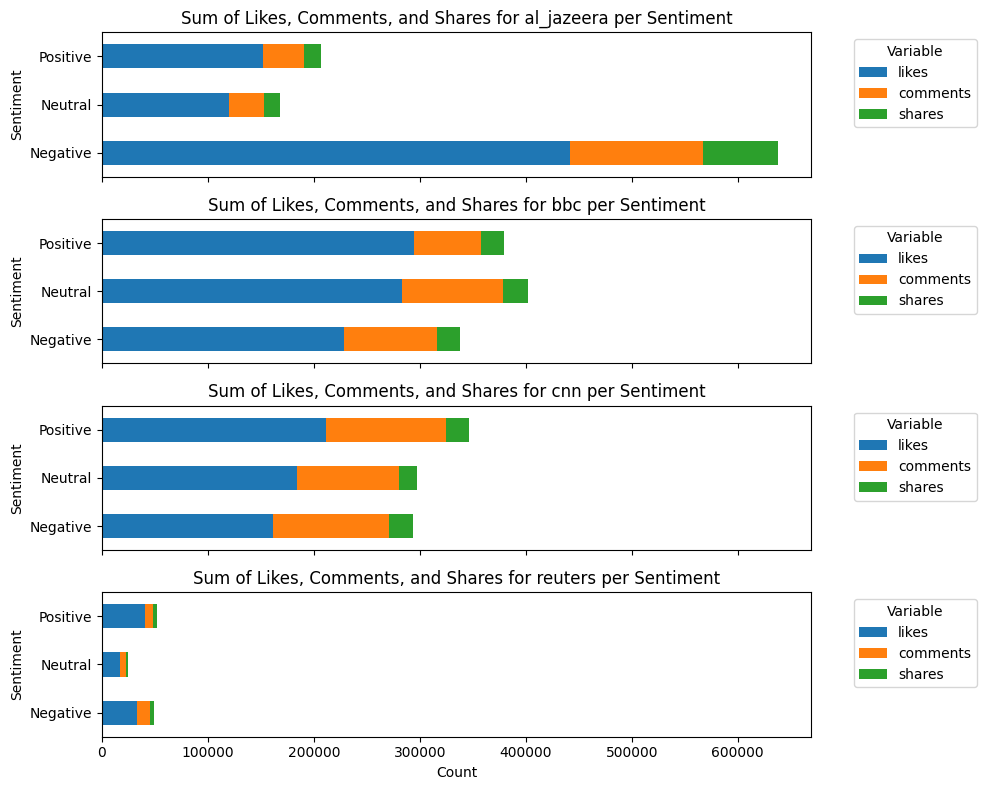

In [23]:
# List of unique media IDs
media_ids = df['id'].unique()

# Create subplots for each media
fig, axs = plt.subplots(nrows=len(media_ids), figsize=(10, 8), sharex=True)

# Iterate over each media ID
for i, media_id in enumerate(media_ids):
    # Filter the DataFrame for the current media ID
    media_df = df[df['id'] == media_id]
    
    # Group by 'Sentiment' and sum the 'likes', 'comments', and 'shares'
    variables_sum = media_df.groupby('Sentiment')[['likes', 'comments', 'shares']].sum()
    
    # Plot the stacked barh plot
    variables_sum.plot(kind='barh', stacked=True, ax=axs[i])
    axs[i].set_xlabel('Count')
    axs[i].set_ylabel('Sentiment')
    axs[i].set_title(f'Sum of Likes, Comments, and Shares for {media_id} per Sentiment')
    axs[i].legend(title='Variable', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

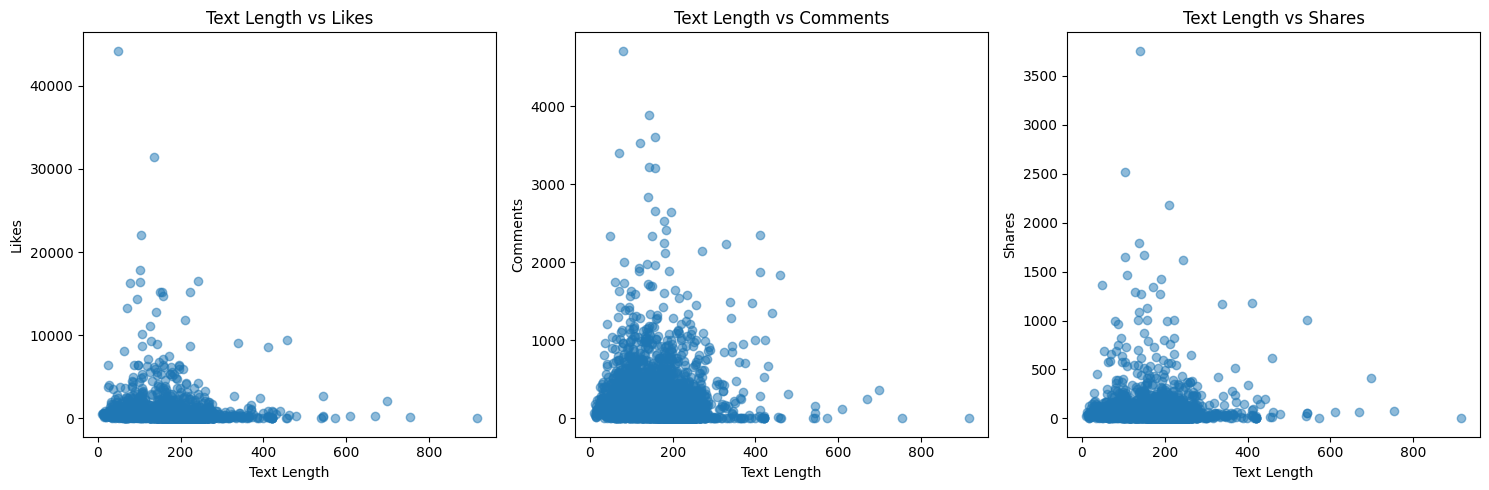

In [26]:
# Create scatter plots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(df['text'].apply(len), df['likes'], alpha=0.5)
plt.title('Text Length vs Likes')
plt.xlabel('Text Length')
plt.ylabel('Likes')

plt.subplot(1, 3, 2)
plt.scatter(df['text'].apply(len), df['comments'], alpha=0.5)
plt.title('Text Length vs Comments')
plt.xlabel('Text Length')
plt.ylabel('Comments')

plt.subplot(1, 3, 3)
plt.scatter(df['text'].apply(len), df['shares'], alpha=0.5)
plt.title('Text Length vs Shares')
plt.xlabel('Text Length')
plt.ylabel('Shares')

plt.tight_layout()
plt.show()

In [27]:
df['Sentiment'].value_counts()

Sentiment
Negative    1625
Positive    1204
Neutral      905
Name: count, dtype: int64

In [29]:
grouped_data = df.groupby(['id', 'Sentiment']).size().unstack(fill_value=0)
grouped_data


Sentiment,Negative,Neutral,Positive
id,,,
al_jazeera,595,165,221
bbc,331,378,291
cnn,320,179,254
reuters,379,183,438
